In [178]:
#AIM : PREDICT THE STOCK PRICE FOR THE NEXT THREE MONTHS FOR AMAZON

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
from time import time
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
register_matplotlib_converters()

In [179]:
# READING DATASET
df = pd.read_csv('Amazon.csv')

In [180]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400
5,2015-01-09,301.480011,302.869995,296.679993,296.929993,296.929993,2592400
6,2015-01-12,297.559998,298.510010,289.279999,291.410004,291.410004,3421400
7,2015-01-13,297.480011,301.500000,293.230011,294.739990,294.739990,4136400
8,2015-01-14,291.929993,295.910004,286.500000,293.269989,293.269989,5538700
9,2015-01-15,294.000000,296.000000,286.820007,286.950012,286.950012,4419200


In [181]:
df['Date'] = pd.to_datetime(df.Date)

In [182]:
#set date as index
df.set_index('Date', inplace=True)

In [183]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


In [184]:
df.shape

(1761, 6)

In [185]:
def plot_col(stk, lbl='Column val'):
    plt.figure(figsize=(10,4))
    plt.plot(stk)
    plt.title(lbl)
    plt.ylabel('Stock Price')
    plt.xlabel('Year')
    for year in range(2015,2023):
        plt.axvline(str(year)+'-01-02', color = 'gray', linestyle='--')
        
    plt.show()
    
def missing_values(df):
    # ARRANGE MISSING VALUES IN A
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # count() only counts the non-NA values, therefore we first use isnull to include all the values (false and true), then count()
    #print(pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent']))
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

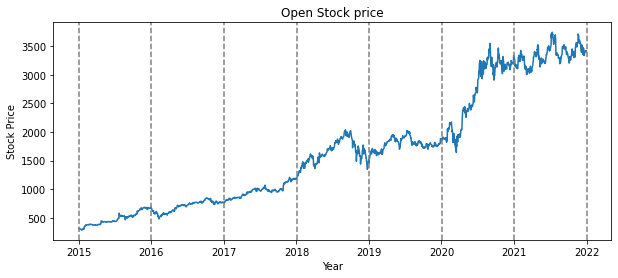

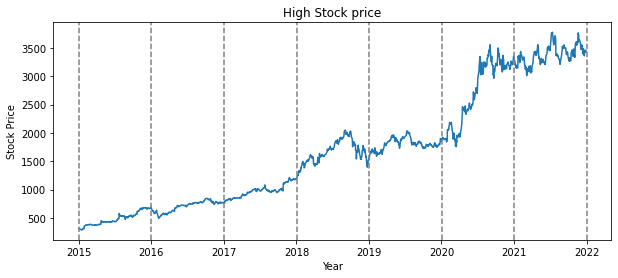

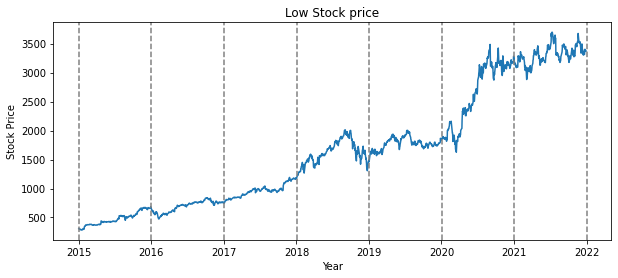

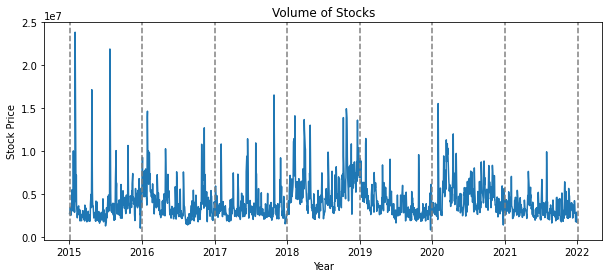

In [186]:
plot_col(df.Open,lbl='Open Stock price')
plot_col(df.High,lbl='High Stock price')
plot_col(df.Low,lbl='Low Stock price')
plot_col(df.Volume,lbl='Volume of Stocks')

In [187]:
df_mon = df.resample(rule='1M').mean()

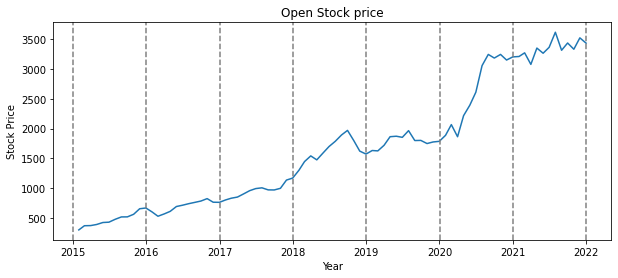

In [188]:
plot_col(df_mon.Open,lbl='Open Stock price')

<AxesSubplot:ylabel='Density'>

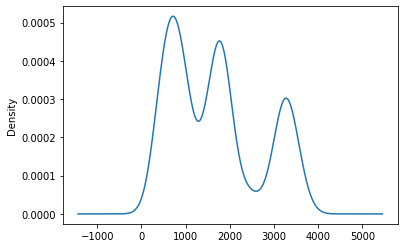

In [189]:
# Visualising distribution with a Kernel Density estimate (draws a gaussian around each point for smooth histogram)
df.Close.plot(kind='kde')

In [190]:
# Looking at the time-series, it is clearly not stationary,

# To give a quantitative proof of it, here is the ADF test


# Performing an Augmented_Dickey_Fuller Test (along with plottin rolling mean)

def perform_adf_test(series,yval=''):
    rolling_mean = series.rolling(12).mean()
    rolling_std = series.rolling(12).std()
    plt.plot(series,color='blue',label='Original Series')
    plt.plot(rolling_mean,color='red',label='Rolling Mean')
    plt.plot(rolling_std,color='black',label='Rolling Std')
    plt.xlabel('Years')
    plt.ylabel('%s Stock price'%yval)
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    adf_result = adfuller(series)
    adf_lbls = pd.Series(adf_result[0:4], index=['Test Statistics','p-value','No. of Lags used','No. of observations used'])
    print(adf_lbls)
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: ', adf_result[1])


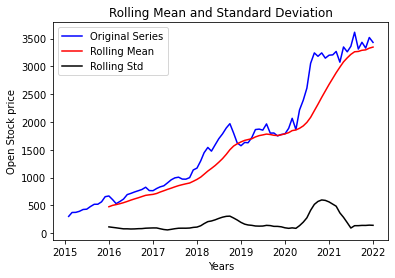

Test Statistics              0.531418
p-value                      0.985797
No. of Lags used             8.000000
No. of observations used    75.000000
dtype: float64
ADF Statistic: 0.531418
p-value:  0.9857973831722165


In [191]:
perform_adf_test(df_mon.Open,'Open')

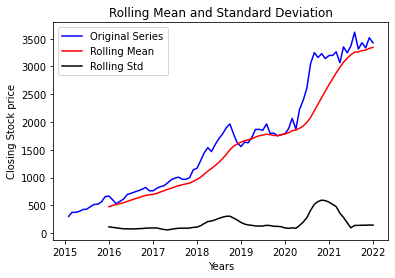

Test Statistics              0.526567
p-value                      0.985659
No. of Lags used             8.000000
No. of observations used    75.000000
dtype: float64
ADF Statistic: 0.526567
p-value:  0.985658584095752


In [192]:
perform_adf_test(df_mon.Close,'Closing')

In [193]:
#Since the p-value is more than 0.05 (also, we can see that the mean and standard deviation are increasing), our series is not stationary

<Figure size 432x288 with 0 Axes>

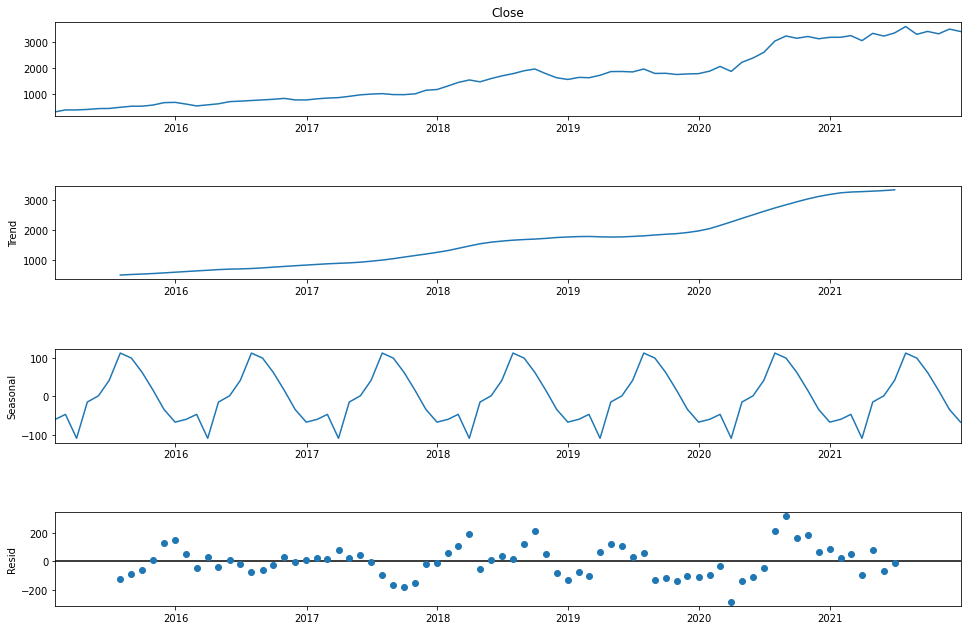

In [194]:
# Therefore, I need to remove the seasonality and trends from this time-series, before proceeding

# Decompose the series:

decomp_series = seasonal_decompose(df_mon.Close,model = 'additive')
fig = plt.figure()
fig = decomp_series.plot()
fig.set_size_inches(15,10)

In [195]:
# Log helps remove increasing variance in the data
df_mon['Close_log'] = np.log(df_mon.Close)


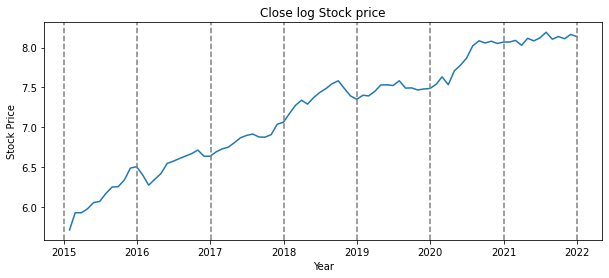

In [196]:
plot_col(df_mon.Close_log,lbl='Close log Stock price')

In [197]:
# Two methods to remove the trend in the time-series
# Method 1: 1st difference: Subtracting 1 lag

df_mon['Close_1diff'] = df_mon.Close_log.diff()[1:]

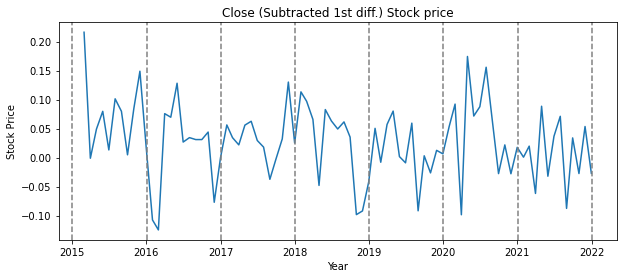

In [198]:
plot_col(df_mon.Close_1diff,lbl='Close (Subtracted 1st diff.) Stock price')

Text(0, 0.5, '1st diff. of Log of Closing Stock Price')

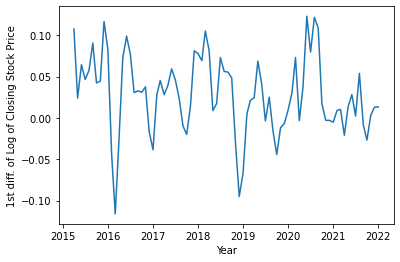

In [199]:
# Also checking both rolling mean of this 1st difference time series:

plt.plot(df_mon.Close_1diff.rolling(window = 2).mean())
plt.xlabel('Year')
plt.ylabel('1st diff. of Log of Closing Stock Price')

In [200]:
df_mon = df_mon.dropna()

<Figure size 432x288 with 0 Axes>

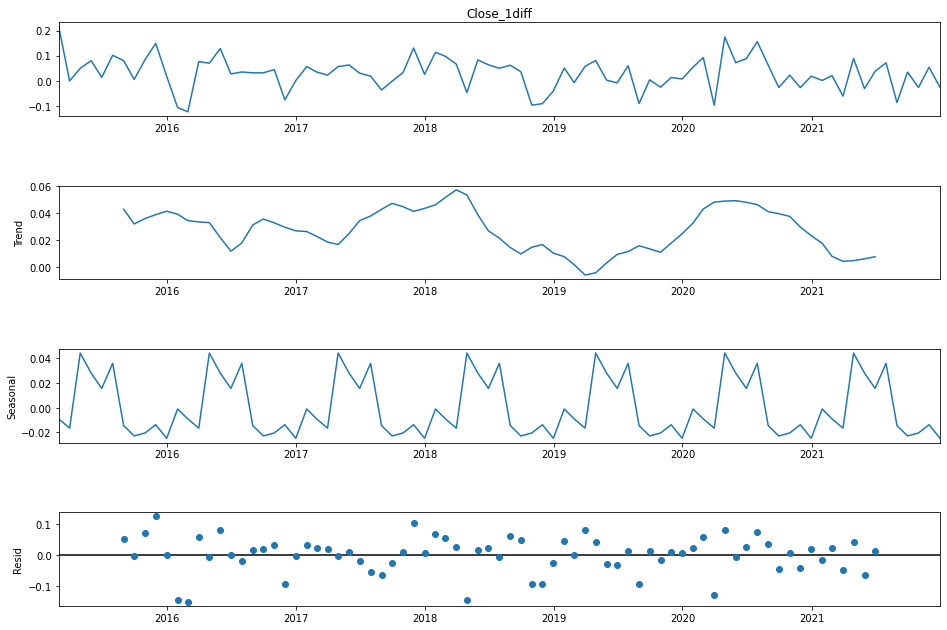

In [201]:
# Checking with decomposition

decomp_series = seasonal_decompose(df_mon.Close_1diff,model = 'additive')
fig = plt.figure()
fig = decomp_series.plot()
fig.set_size_inches(15,10)


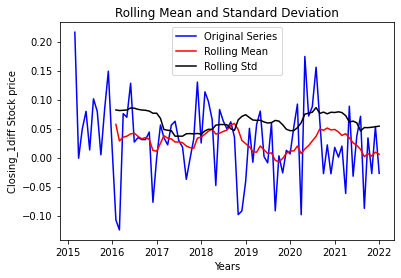

Test Statistics            -8.640603e+00
p-value                     5.439213e-14
No. of Lags used            0.000000e+00
No. of observations used    8.200000e+01
dtype: float64
ADF Statistic: -8.640603
p-value:  5.4392129902309154e-14


In [202]:
perform_adf_test(df_mon.Close_1diff,'Closing_1diff')

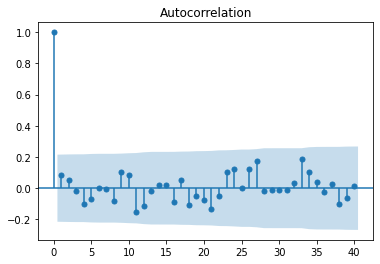

In [203]:
# Doing a 1-difference after log turned out to be enough to make a stationary time-series here

# I can now proceed to apply ACF and PACF

acf_plot = plot_acf(df_mon.Close_1diff,lags = 40)

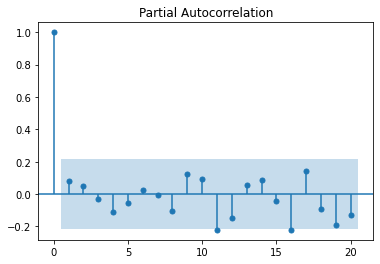

In [204]:
pacf_plot = plot_pacf(df_mon.Close_1diff)

In [205]:
# Method 2: Subtract the moving average to remove this trend

moving_avg = df_mon.Close_log.rolling(window = 2).mean()


In [206]:
df_mon['Close_sub_avg'] = df_mon.Close_log - moving_avg

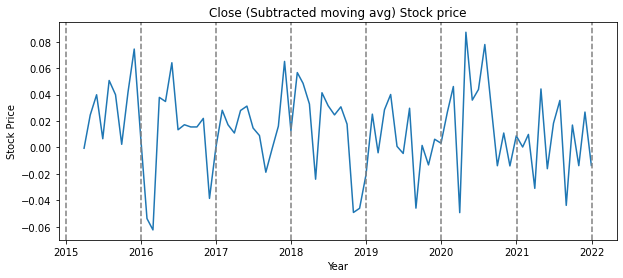

In [207]:
plot_col(df_mon.Close_sub_avg,lbl='Close (Subtracted moving avg) Stock price')

In [208]:
df_mon = df_mon.dropna()

<Figure size 432x288 with 0 Axes>

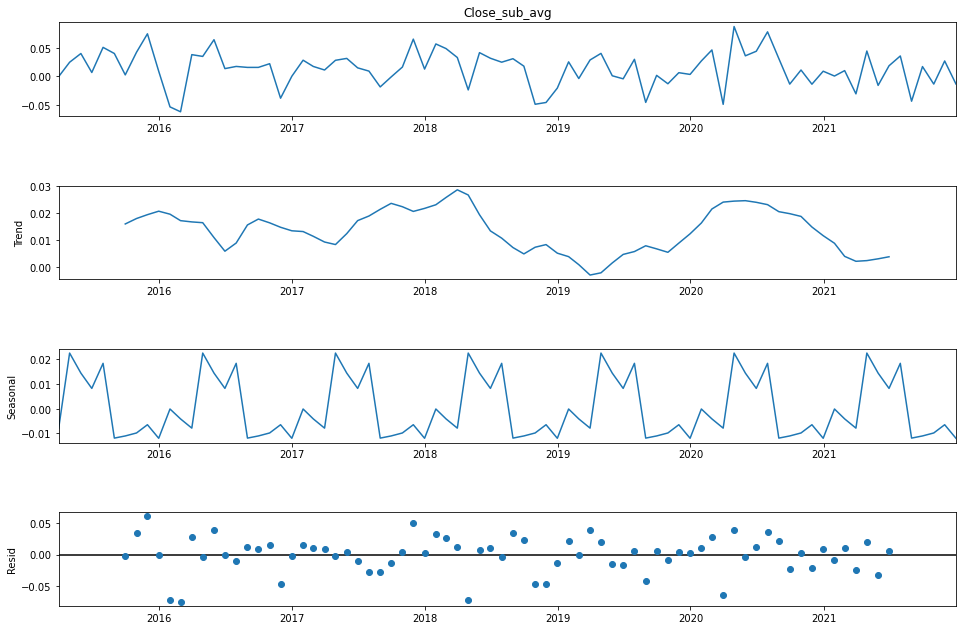

In [209]:
#The trend is now removed.

#Let's decompose again

decomp_series = seasonal_decompose(df_mon.Close_sub_avg,model = 'additive')
fig = plt.figure()
fig = decomp_series.plot()
fig.set_size_inches(15,10)

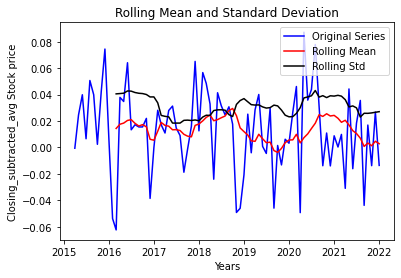

Test Statistics            -7.932666e+00
p-value                     3.479422e-12
No. of Lags used            0.000000e+00
No. of observations used    8.100000e+01
dtype: float64
ADF Statistic: -7.932666
p-value:  3.4794215065651308e-12


In [210]:
perform_adf_test(df_mon.Close_sub_avg,'Closing_subtracted_avg')

In [211]:
#All the seasonality and trend have been successfully removed from the time-series.
# Subtracting Moving average gives a smaller p-value. 

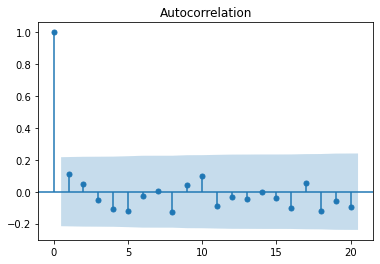

In [212]:
# Plotting the ACF : Auto Correlation Function

# Lags of the series are how many units before from that are calculated 
acf_plot = plot_acf(df_mon.Close_sub_avg,lags = 20)

# 1st line is corr of y with lag1
# 2nd line is corr of y with lag2 (including contributions from both 1 and 2)
# If there exist a seasonal pattern in the series, there will be a repetetive pattern in the ACF

# Blue shaded region includes statistically insignificant relationships and outside are significant ones


# Max lag is 100 here

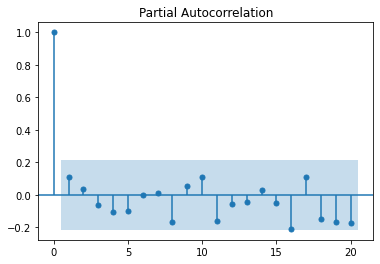

In [216]:
pacf_plot = plot_pacf(df_mon.Close_sub_avg)

In [214]:
# Lag of MA model (monthly) comes from ACF:
# 2nd diff: 
#                    Non-Seasonal: 1
#                    Seasonal: 0

# Lag of AR model (monthly) comes from PACF:
# 2nd diff: 
#                    Non-Seasonal: 2
#                    Seasonal: 0


# Lag of MA model (monthly) comes from ACF:
# sub moving avg: 
#                    Non-Seasonal: 3
#                    Seasonal: 0

# Lag of AR model (monthly) comes from PACF:
# sub moving avg: 
#                    Non-Seasonal: 1
#                    Seasonal: 3


# Non-seasonal MA Lag in sub avg ts: 6 or 7
# Seasonal MA Lag in sub avg ts: 
# We can take 5 lags from 1st diff time-series and 6 or 7 lags from subtracted average


# Lag of AR model comes from PACF: We can take 5 lags from 1st diff time-series and 6 lags from subtracted average

In [251]:
# First looking at ARMA model:

split = int(0.8*len(df_mon))

# Since ARIMA needs a stationary time-series, I am giving 1diff logged time-series to train
train_data = df_mon[:split+1].Close_1diff
test_data = df_mon[split:].Close_1diff

#Lag of 11 or 16, let's check 11 first

model_ar = ARIMA(train_data, order = (11,1,0))
start = time()
model_ar_fit = model_ar.fit()
end = time()
print('Time took for the ARIMA model to run: %f s'%(end - start))
print(model_ar_fit.summary())

/home/tasha/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Time took for the ARIMA model to run: 33.920735 s
                             ARIMA Model Results                              
Dep. Variable:          D.Close_1diff   No. Observations:                   65
Model:                ARIMA(11, 1, 0)   Log Likelihood                  89.156
Method:                       css-mle   S.D. of innovations              0.060
Date:                Sun, 01 Oct 2023   AIC                           -152.311
Time:                        19:38:06   BIC                           -124.044
Sample:                    04-30-2015   HQIC                          -141.158
                         - 08-31-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004      0.002      0.226      0.821      -0.003       0.004
ar.L1.D.Close_1diff     -0.6372      0.125     -5.1

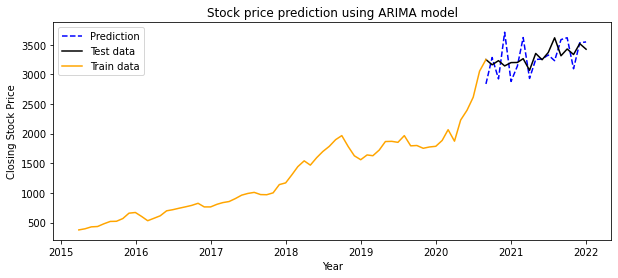

In [312]:
# get prediction by simply inputing the times that I want to predict for

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_ar_fit.predict(start = pred_start_date, end = pred_end_date)

# Check how are residuals (test_data = actual, prediction = is pred from model)
residuals = test_data - predictions
train_data_rev = df_mon[:split+1].Close
test_data = df_mon[split:].Close
pred_rev=[]

# Reversing the differencing and log for predictions
for i in range(0,len(predictions)):
    prev_point = df_mon.Close_log[split+i-1]
    pred_rev.append(predictions[i] + prev_point)

pred_rev = [np.exp(p) for p in pred_rev]

# Plotting non-transformed train and test data  

plt.figure(figsize = (10,4))
plt.plot(test_data.index,pred_rev,label='Prediction',linestyle='--',color='blue')
plt.plot(test_data,label='Test data', color='black')
plt.plot(train_data_rev,label='Train data',color='Orange')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.title('Stock price prediction using ARIMA model')
#plt.plot(residuals,label='resids')
plt.legend()
plt.show()
#plt.plot(test_data_rev,label='test')

AttributeError: 'ARIMAResults' object has no attribute 'get_forecast'

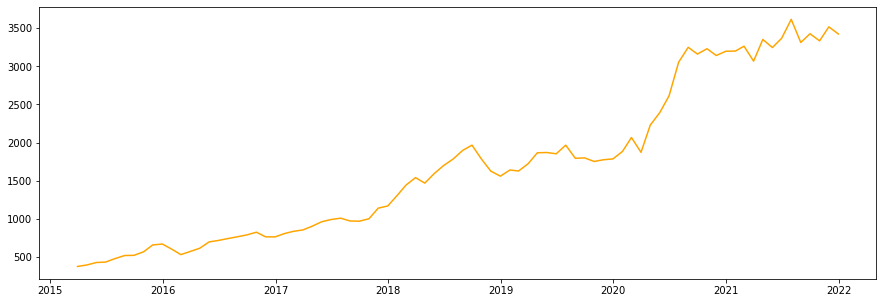

In [326]:
# Plot forecast with ARIMA model 
all_data = df_mon.Close

fig, ax = plt.subplots(figsize=(15, 5))  
ax.plot(all_data,label='Actual',color='orange')
# Construct the forecasts with 90% Confidence Interval
fcast_ar = model_ar_fit.get_forecast('2022-05-31').summary_frame(alpha=0.10)
#print(fcast)
fcast_ar['mean'].plot(ax=ax, style='--')
ax.fill_between(fcast_ar.index, fcast_ar['mean_ci_lower'], fcast_ar['mean_ci_upper'], color='blue', alpha=0.1) 
plt.xlabel('Years')
plt.ylabel('Closing Stock Price')
plt.title('Forecast with 90% C.I. in Future (ARIMA)')
plt.legend()
fig.tight_layout()
plt.show()

In [360]:
# Implementing SARIMA model first

# Splitting train and test data set

split = int(0.8*len(df_mon))
train_data = df_mon[:split].Close
test_data = df_mon[split:].Close

In [415]:
model = SARIMAX(train_data, order = (1,1,0), seasonal_order=(1,0,0,2))

In [416]:
start = time()
model_fit = model.fit()
end = time()
print('Time took for the SARIMA model to run: %f s'%(end - start))

Time took for the SARIMA model to run: 0.105591 s


In [417]:
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                   65
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 2)   Log Likelihood                -388.304
Date:                           Mon, 02 Oct 2023   AIC                            782.608
Time:                                   16:39:05   BIC                            789.084
Sample:                               03-31-2015   HQIC                           785.159
                                    - 07-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2280      0.093      2.462      0.014       0.046       0.409
ar.S.L2        0.2664      0.132      2.019

In [418]:
#Only upto lag 4 or 5 are significant

In [419]:
# get prediction by simply inputing the times that I want to predict for

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]


In [420]:
predictions = model_fit.predict(start = pred_start_date, end = pred_end_date)

In [421]:
#Check how are residuals (test_data = actual, prediction = is pred from model)
residuals = test_data - predictions

Text(0.5, 0, 'Year')

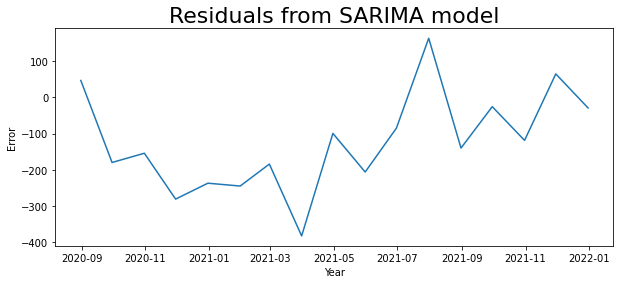

In [422]:
plt.figure(figsize = (10,4))
plt.plot(residuals)
plt.title('Residuals from SARIMA model',fontsize = 22)
plt.ylabel('Error')
plt.xlabel('Year')


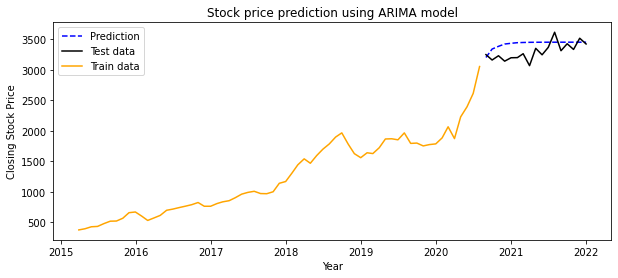

In [423]:

plt.figure(figsize = (10,4))
plt.plot(predictions,label='Prediction',linestyle='--',color='blue')
plt.plot(test_data,label='Test data',color='black')
plt.plot(train_data,label='Train data',color='orange')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.title('Stock price prediction using ARIMA model')
#plt.plot(residuals,label='resids')
plt.legend()

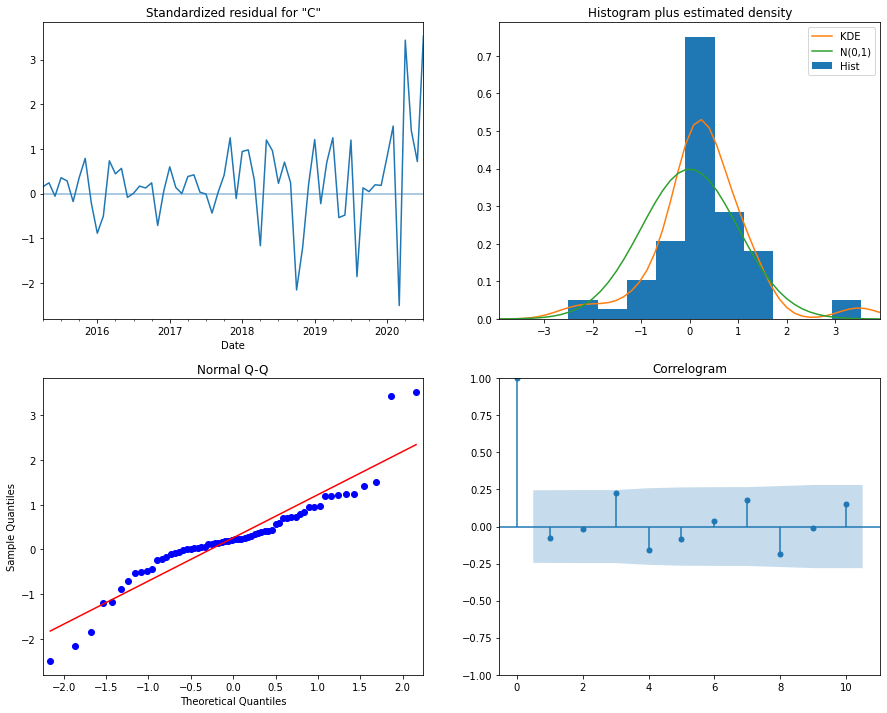

In [424]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

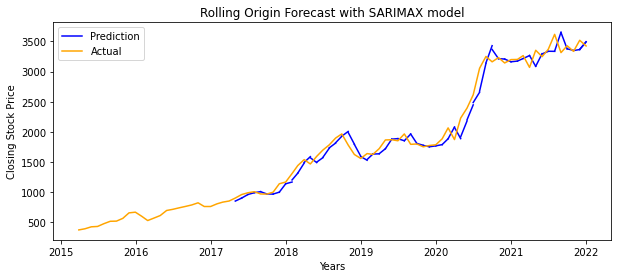

In [425]:
# Trying Rolling Forecast for every month with SARIMAX model

# split = int(0.8*len(df_mon))
all_data = df_mon.Close
plt.figure(figsize = (10,4))
#plt.plot(train_data,label='train', color='black')
for end in range(25,len(df_mon)-1):
    train_data = df_mon[:end+1].Close
    test_data = df_mon[end:end+2].Close
    model = SARIMAX(train_data, order = (1,1,0), seasonal_order=(1,0,0,2))#(8,0,0,12))
    model_fit = model.fit()
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    predictions = model_fit.predict(start = pred_start_date, end = pred_end_date)
    #Check how are residuals (test_data = actual, prediction = is pred from model)
    residuals = test_data - predictions
    plt.plot(predictions,color='blue')
    #plt.plot(train_data,label='train', color='black')

plt.plot(predictions,label='Prediction',color='blue')
#plt.plot(predictions,label='pred',color='blue')
plt.title('Rolling Origin Forecast with SARIMAX model')
plt.plot(all_data,label='Actual',color='orange')
plt.xlabel('Years')
plt.ylabel('Closing Stock Price')
plt.legend()
plt.show()




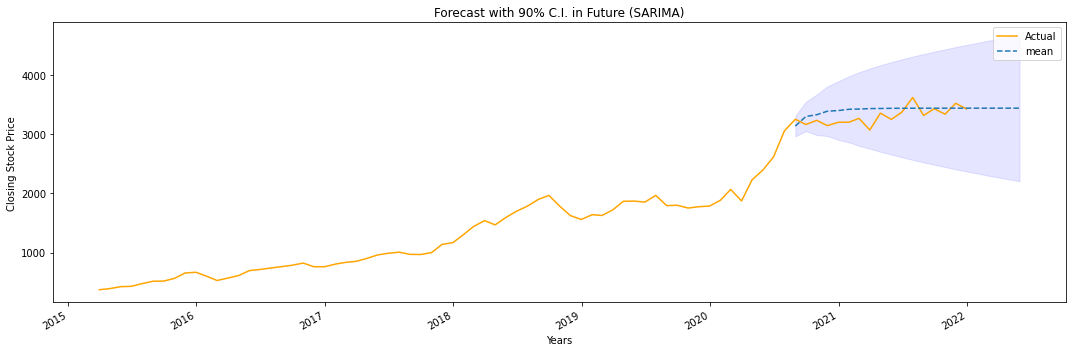

In [431]:
# Forecast of stock price in future
split = int(0.80*len(df_mon))
train_data = df_mon[:split].Close
test_data = df_mon[split:].Close
model = SARIMAX(train_data, order = (0,1,0), seasonal_order=(1,0,0,2))
model_fit = model.fit()

# Plot forecast
fig, ax = plt.subplots(figsize=(15, 5))  
ax.plot(all_data,label='Actual',color='orange')
# Construct the forecasts with 90% Confidence Interval
fcast = model_fit.get_forecast('2022-05-31').summary_frame(alpha=0.10)
#print(fcast)
fcast['mean'].plot(ax=ax, style='--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='blue', alpha=0.1) 
plt.xlabel('Years')
plt.ylabel('Closing Stock Price')
plt.title('Forecast with 90% C.I. in Future (SARIMA)')
plt.legend()
fig.tight_layout()
plt.show()

In [444]:

def solution(inputString):
    pal = inputString[::-1]
    # Split it if white-spaces and make it backward
    if inputString == pal:
        return True
    else:
        return False
    
    
solution('racecars')

False